# __Streaming provider: Movie dataset__

__The most difficult decision is the following one: Which movie we want to see tonight?__

There are a lot of streaming provider out there but the 2 biggest one are for sure Prime Video and Netflix.

The dataset I used contains data from 4 streaming provider: Prime Video, Netflix, Hulu and Disney+. 

For sure I could also add Sky, Apple or others, but I want to focus on the biggest global provider I can also watch in Germany.

In this project I want to get an overview of the following:
* numbers of movies on the 4 streaming provider
* what are the most common genres
* which runtime -> also important for making the decision for the tonight's movie :-)
* what are the most common languages
* which directors are the most common ones
* which genres are the most common ones in German

And - also really important due to the increasing number of streaming provider - which provider has the best package with the most movies and the genres I like.

---
---

## __Basics__

### __Import libraries and tools__

In [1]:
# import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import math
from math import sqrt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

---

### __Import dataset__

In [2]:
movies=pd.read_csv('../data/MoviesOnStreamingPlatforms_updated.csv')

---
---

## __Overview: Dataset__

Let's have a look on the dataset to see how many columns / features are included, how many missing values and more.

In [3]:
movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [4]:
movies.tail()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
9510,9510,9511,Most Wanted Sharks,2020,NaN,NaN,14/100,0,0,0,1,0,NaN,"Crime,Reality-TV",United States,"Greek,English",NaN
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,NaN,13/100,0,0,0,1,0,Chris Anthony Hamilton,Animation,United States,English,23.0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,NaN,13/100,0,0,0,1,0,NaN,NaN,United States,NaN,NaN
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,NaN,10/100,0,0,0,1,0,Dan Oliver,"Drama,History",NaN,NaN,NaN
9514,9514,9515,Women of Impact: Changing the World,2019,7+,NaN,10/100,0,0,0,1,0,Lisa Feit,Documentary,United States,English,NaN


In [5]:
movies.shape

(9515, 17)

In [6]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9515.0,4757.000000,2746.888239,0.0,2378.5,4757.0,7135.5,9514.0
ID,9515.0,4758.000000,2746.888239,1.0,2379.5,4758.0,7136.5,9515.0
Year,9515.0,2007.422386,19.130367,1914.0,2006.0,2015.0,2018.0,2021.0
Netflix,9515.0,0.388334,0.487397,0.0,0.0,0.0,1.0,1.0
Hulu,9515.0,0.110037,0.312952,0.0,0.0,0.0,0.0,1.0
Prime Video,9515.0,0.432265,0.495417,0.0,0.0,0.0,1.0,1.0
Disney+,9515.0,0.096900,0.295837,0.0,0.0,0.0,0.0,1.0
Type,9515.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Runtime,9196.0,95.199435,29.654047,1.0,85.0,95.0,109.0,566.0


There are 9,515 entries in the dataset. 
* 50% of the movies were released after 2015.
* The oldest movie in the dataset is from 1914.
* The values in the 4 streaming provider Netflix, Hulu, Prime Video and Disney+ are 1 and 0 for True (1) and False (0), so originally bool.
* The columns "Unnamed:0" and "Type" I will drop because they won't add any value.
* The column "Runtime" includes film lengths of 1 min up to 566 min (around 9.5 hours).
* Most of the movies have a runtime of over 1.5 hour.

---

### __Check for the data types and missing values__

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9515 non-null   int64  
 1   ID               9515 non-null   int64  
 2   Title            9515 non-null   object 
 3   Year             9515 non-null   int64  
 4   Age              5338 non-null   object 
 5   IMDb             9309 non-null   object 
 6   Rotten Tomatoes  9508 non-null   object 
 7   Netflix          9515 non-null   int64  
 8   Hulu             9515 non-null   int64  
 9   Prime Video      9515 non-null   int64  
 10  Disney+          9515 non-null   int64  
 11  Type             9515 non-null   int64  
 12  Directors        9104 non-null   object 
 13  Genres           9399 non-null   object 
 14  Country          9261 non-null   object 
 15  Language         9202 non-null   object 
 16  Runtime          9196 non-null   float64
dtypes: float64(1),

As I have seen here, there are missing values in 8 of the 17 columns. 

Most of them are missing in the age and directors columns.

In [8]:
movies.isna().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                4177
IMDb                206
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
Directors           411
Genres              116
Country             254
Language            313
Runtime             319
dtype: int64

In [33]:
movies['Age'] = movies['Age'].fillna('no age info')

---

## __Overview: values in the columns__

To understand the data better I check for unique values in the columns.

### __column "AGE"__

In [39]:
movies['Age'].unique()

array(['18+', '7+', '13+', '16+', 'all', 'no age info'], dtype=object)

The column __"Age"__ has 5 different categories which are comparable to the 5 in Germany and also to most other countries: 
* all (no restriction)
* 7+ for a minimum age of 7 years
* 13+ for a minimum age of 13 years
* 16+ for a minimum age of 16 years
* 18+ for a minimum age of 18 years


1 additional column with originally "nan", so we don't have any info if the movie is without any age restriction. 

So I renamed the nan to "no age info". 

This could also be the "age category" for documentaries.

If the movies will be on television and not 24/7/365 available via one or more streaming provider, the age restriction has an impact on the release 
* no age restriction and 7+: any time of day or night
* 13+: between 6 AM and 8 PM
* 16+: between 10 PM and 6 AM
* 18+: between 11 PM to 6 AM
* If a tv channel has a 16+ movie before this time, they will show a "cutted version".

___no age restriction:___
* children under 7 completely identify with the storyline and the characters in the movie
* quick and positive resolution of problematic situations very important
* not mobilizing fears or lead to irritation
* no dark scenarios
* no rapid editing sequences
* no loud and threatening soundscape
* no violence
* no relationship conflicts
* no persecutions


___7+ age restriction:___

* children develop ability to cognitively process sensory impressions, but differences in the development between 7 and 13
* positive resolution of conflict situations is also decisive 
* children with the age of 9+ begin to be able to distinguish between fictional and real stories, distancing perception possible
* younger children are still completely immersed in the plot, suffers and fears with the identification characters
* moments of tension and threat can be already be coped with, but should not last too long or have a too lasting effect

___13+ age restriction:___

* have developed ability to perceive things from a distance and to process them rationally
* genre knowledge is available
* higher intensity of excitement (e.g. thriller, science fiction)
* flood of images of hard, violent action films is problematic
* puberty phase of self-discovery, associated with great insecurity and vulnerability
* seriously address social issues, movies which are important for forming opinions and awareness
* problematic: identification character with antisocial, destructive or violent behavior


___16+ age restriction:___

* developed media competence
* communication of socially harmful messages remains problematic
* not approved: movies tend to glorify violence, oppose gender roles as partners, discriminate against individual groups, or reduce sexuality to a pure instrument of sexual gratification
* examined with particular sensitivity: value orientation in areas such as drug use, political radicalism or xenophobia


___18+ age restriction:___

* no youth-rating

In [34]:
movies.groupby('Age').size().sort_values(ascending=False)

Age
no age info    4177
18+            2276
7+             1090
13+             998
all             698
16+             276
dtype: int64

In [35]:
movies['Age'].sort_values(ascending=False)

3175    no age info
3671    no age info
3669    no age info
3668    no age info
3667    no age info
           ...     
1076            13+
4049            13+
4065            13+
4066            13+
4757            13+
Name: Age, Length: 9515, dtype: object

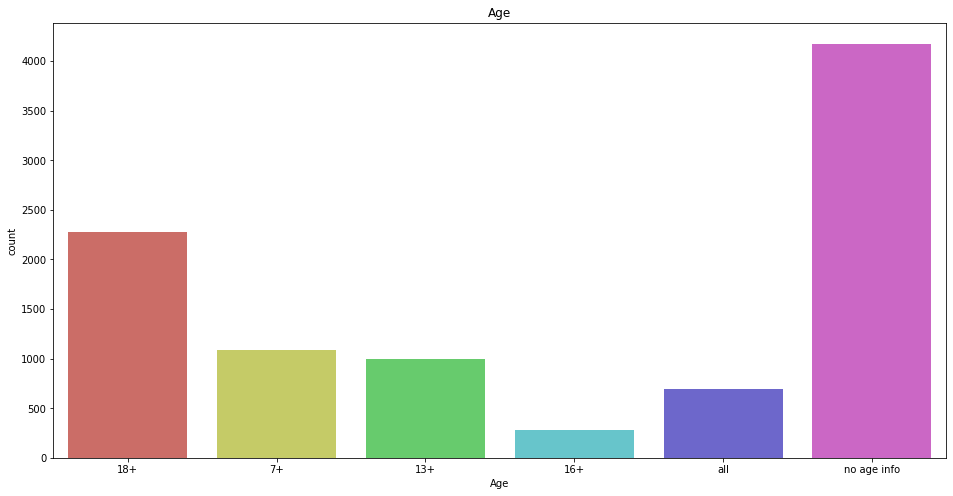

In [38]:
  plt.figure(figsize=(16,8))
  plt.title('Age')
  sns.countplot(x=movies['Age'], palette='hls');

---

### __column "TYPE"__

The column "Type" doesn't add any value, so I will drop it.

In [16]:
movies['Type'].unique()

array([0])

---

### __column "GENRE"__

The column __"Genre"__ has different categories. 

Most of the movies are assigned to only one genre, but some are assigned to a combination of categories.

Most common are the genres Drama and Comedy.

In [17]:
movies['Genres'].unique()

array(['Biography,Crime,Drama', 'Action,Biography,Drama,Sport',
       'Documentary,Biography', ..., 'Adventure,Comedy,Musical,Sci-Fi',
       'Comedy,Reality-TV,Talk-Show', 'Crime,Reality-TV'], dtype=object)

In [18]:
movies['Genres'].sort_values(key=lambda x: x.str.len(), ascending=False)

8934    Animation,Action,Adventure,Comedy,Family,Fanta...
1537    Animation,Action,Adventure,Comedy,Crime,Family...
3065    Animation,Short,Action,Adventure,Comedy,Drama,...
8732    Animation,Adventure,Drama,Family,Fantasy,Music...
4567    Animation,Action,Adventure,Comedy,Drama,Family...
                              ...                        
9493                                                  NaN
9498                                                  NaN
9505                                                  NaN
9509                                                  NaN
9512                                                  NaN
Name: Genres, Length: 9515, dtype: object

In [19]:
movies['Genres'].loc[8933:8935].head()

8933    Animation,Action,Adventure,Comedy,Drama,Family...
8934    Animation,Action,Adventure,Comedy,Family,Fanta...
8935                          Comedy,Drama,Family,Fantasy
Name: Genres, dtype: object

In [20]:
movies.groupby('Genres').size().sort_values(ascending=True)

Genres
Animation,Short,Adventure,Comedy,Family,Fantasy,Sci-Fi             1
Biography,Comedy,Drama,Family,Sport                                1
Biography,Comedy,Drama,Fantasy,Horror,Mystery,Sci-Fi,Thriller      1
Biography,Comedy,Drama,Musical,Romance                             1
Biography,Comedy,Drama,Sport                                       1
                                                                ... 
Drama,Romance                                                    258
Comedy,Drama                                                     309
Documentary                                                      567
Drama                                                            604
Comedy                                                           780
Length: 1418, dtype: int64

---

### __column "LANGUAGE"__

The column __"Language"__ contains the spoken languages in which a movie is available. 

I expect that the most common language is English - also due to the origin of the 4 streaming provider.

In [40]:
movies['Language'].unique()

array(['English,Italian,Latin,Spanish,German', 'Hindi,English', 'English',
       'English,Korean,Spanish', 'English,French', 'English,Latin,French',
       'Hindi', 'English,East-Greenlandic', 'English,French,Swahili',
       'English,French,Latin',
       'Spanish,German,Russian,French,Italian,Polish,English',
       'English,Cantonese', 'Ukrainian,Russian,English',
       'English,Spanish', 'French', 'English,German,French,Italian',
       'Spanish,English,Mandarin,French,Hindi', 'Arabic,Nyanja,English',
       'Hungarian', 'English,German', 'French,English',
       'English,Hindi,Bangla', 'English,Dinka', 'Tamil',
       'English,German,French', 'Indonesian,English,Mandarin,French',
       'English,German,Hebrew,Spanish', 'English,Mandarin',
       'English,German,Russian', 'Spanish', 'Arabic,English',
       'English,Korean', 'Italian,English',
       'English,Serbian,German,Italian,French', 'English,Spanish,French',
       'English,German,Italian,French,Spanish',
       'English,

---

### __column "COUNTRY"__

The column __"Country"__ contains the country in which a movie is available. 

I expect that the US are the most common country - also due to the origin of the 4 streaming provider.

In [41]:
movies['Country'].unique()

array(['United States',
       'India,United States,United Kingdom,Australia,Kenya,Namibia',
       'United Kingdom', 'India,United Kingdom',
       'United Kingdom,United States', 'South Korea,United States',
       'United States,United Kingdom,India', 'India',
       'United States,Canada', 'United Kingdom,Congo - Brazzaville',
       'United Kingdom,Hungary,United States,Australia', 'Australia',
       'Spain', 'United States,Hong Kong SAR China',
       'United Kingdom,Ukraine,United States', 'France,United States',
       'United Kingdom,Malawi', 'Canada,Hungary,United States', 'Hungary',
       'France', 'United States,United Kingdom',
       'United States,Canada,Thailand',
       'United Kingdom,United States,Japan',
       'United Kingdom,France,United States', 'Indonesia,United States',
       'United Kingdom,France,Poland,Germany,United States',
       'Argentina,Spain',
       'United Kingdom,France,Belgium,Ireland,United States',
       'United Kingdom,France,United State

---
---

## __Delete, split and create new columns__

I drop the columns "Unnamed: 0" and "Type" before I will also split the columns "Genres", "Country" and "Language".

In [42]:
movies = movies.drop(['Unnamed: 0', 'Type'], axis = 1)

In [43]:
movies.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [44]:
movies.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')

---

### __Language: split and create new columns__

In [45]:
# dropping null value columns to avoid errors
movies['Language'].dropna(inplace = True)

In [46]:
# new data frame with split value columns
new = movies["Language"].str.split(",", n = 7, expand = True)
  
# making separate columns from new data frame
movies["1st_Language"]= new[0]
movies["2nd_Language"]= new[1]
movies["3rd_Language"]= new[2]
movies["4th_Language"]= new[3]
movies["5th_Language"]= new[4]
movies["6th_Language"]= new[5]
movies["7th_Language"]= new[6]
  
# df display
movies

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,Country,Language,Runtime,1st_Language,2nd_Language,3rd_Language,4th_Language,5th_Language,6th_Language,7th_Language
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,...,United States,"English,Italian,Latin,Spanish,German",209.0,English,Italian,Latin,Spanish,German,None,None
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,...,"India,United States,United Kingdom,Australia,K...","Hindi,English",161.0,Hindi,English,None,None,None,None,None
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,...,United Kingdom,English,83.0,English,None,None,None,None,None,None
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,...,"India,United Kingdom","Hindi,English",224.0,Hindi,English,None,None,None,None,None
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,...,"United Kingdom,United States",English,52.0,English,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,9511,Most Wanted Sharks,2020,no age info,NaN,14/100,0,0,0,1,...,United States,"Greek,English",NaN,Greek,English,None,None,None,None,None
9511,9512,Doc McStuffins: The Doc Is In,2020,no age info,NaN,13/100,0,0,0,1,...,United States,English,23.0,English,None,None,None,None,None,None
9512,9513,Ultimate Viking Sword,2019,no age info,NaN,13/100,0,0,0,1,...,United States,NaN,NaN,NaN,NaN,None,None,None,None,None
9513,9514,Hunt for the Abominable Snowman,2011,no age info,NaN,10/100,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None


---

## __Streaming provider: Prime Video, Netflix, Hulu, Disney+__

In [50]:
movies['Netflix'].sum()

3695

In [51]:
movies['Disney+'].sum()

922

In [52]:
movies['Hulu'].sum()

1047

In [53]:
movies['Prime Video'].sum()

4113

In [54]:
movies_plot = movies.groupby(['Prime Video', 'Netflix', 'Hulu', 'Disney+']).size().reset_index()

In [60]:
movies_plot.sort_values(by=[0], ascending=False)

,Prime Video,Netflix,Hulu,Disney+,0
6,1,0,0,0,3901
3,0,1,0,0,3550
1,0,0,1,0,911
0,0,0,0,1,900
9,1,1,0,0,101
8,1,0,1,0,92
5,0,1,1,0,32
7,1,0,0,1,11
11,1,1,1,0,6
2,0,0,1,1,5


* Most of the movies are available on Prime Video and Netflix.
* Amazon and Netflix have own productions - not only in series - and they have an increasing potential to win prizes.
* There are also movies available on 2 or more of the streaming provider. 
* This is also important when I want to know if I want to subscribe for another streaming provider.


---

### __Countries: split and create new columns__

In [ ]:
# dropping null value columns to avoid errors
movies['Country'].dropna(inplace = True)

In [ ]:
movies['Country']=movies["Country"].apply(str)

In [ ]:
# new data frame with split value columns
new_c = movies["Country"].str.split(",", n = 7, expand = True)
  
# making separate columns from new data frame
movies["1st_Country"]= new_c[0]
movies["2nd_Country"]= new_c[1]
movies["3rd_Country"]= new_c[2]
movies["4th_Country"]= new_c[3]
movies["5th_Country"]= new_c[4]
movies["6th_Country"]= new_c[5]
movies["7th_Country"]= new_c[6]

# Dropping old Name columns
movies.drop(columns =["Country"], inplace = True)
  
# df display
movies

In [ ]:
movies.columns

In [ ]:
countries=movies.drop(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Runtime',
       '1st_Language', '2nd_Language', '3rd_Language', '4th_Language',
       '5th_Language', '6th_Language', '7th_Language', 'Genres'], axis=1)

In [ ]:
countries.head()

---

### __Genres: split and create new columns__

In [ ]:
# dropping null value columns to avoid errors
movies['Genres'].dropna(inplace = True)

In [ ]:
# new data frame with split value columns
new_g = movies["Genres"].str.split(",", n = 7, expand = True)
  
# making separate columns from new data frame
movies["1st_Genres"]= new_g[0]
movies["2nd_Genres"]= new_g[1]
movies["3rd_Genres"]= new_g[2]
movies["4th_Genres"]= new_g[3]
movies["5th_Genres"]= new_g[4]
movies["6th_Genres"]= new_g[5]
movies["7th_Genres"]= new_g[6]

# Dropping old Name columns
movies.drop(columns =["Genres"], inplace = True)
  
# df display
movies

In [ ]:
movies

---

### __Provider__

In [ ]:
provider=movies.drop(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes','Directors', 'Genres', 'Country',
       'Language', 'Runtime'], axis = 1)

In [ ]:
provider.head()

---
---

## __Wordclouds__

To create wordclouds with the data in the columns country, language, genre and director, you need to set stopwords and to convert the column contents into a string first.

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS)
stopwords = ["nan", "NaN", "nAN", "nAn", "Nan", "NAN", "none", "None"] + list(STOPWORDS)

In [ ]:
movies['Language']=movies["Language"].apply(str)

---

### __Wordcloud for Country__

In [ ]:
counts = dict()
def word_count(str:str, counts:dict) -> dict:
    words = str.split(',')

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

for items in movies['Country'].iteritems():
    word_count(items[1], counts)

def makeImage(text):
    wc = WordCloud(background_color="white")
    # generate word cloud
    wc.generate_from_frequencies(text)
    # show
    plt.figure(figsize=(10,6)) 
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

makeImage(counts)

---

#### __Wordcloud for language__

In [ ]:
counts = dict()
def word_count(str:str, counts:dict) -> dict:
    words = str.split(',')

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

for items in movies['Language'].iteritems():
    word_count(items[1], counts)

def makeImage(text):
    wc = WordCloud(background_color="white")
    # generate word cloud
    wc.generate_from_frequencies(text)
    # show
    plt.figure(figsize=(12,8), facecolor="black") 
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

makeImage(counts)

In [ ]:
text_language = " ".join(review for review in movies['Language'].astype(str))

In [ ]:
movies_country = movies['Language'].value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(movies_country)
# Generate a word cloud image
wordcloud_searchpath = WordCloud(stopwords=stopwords, background_color="white").generate(text_language)

plt.figure(figsize=(12,8), facecolor="black") 
plt.imshow(wc)
plt.axis('off')
plt.show()

---

#### __Wordcloud for Genres__

In [ ]:
text_genres = " ".join(review for review in movies['Genres'].astype(str))

In [ ]:
movies_genres = movies['Genres'].value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(movies_genres)
# Generate a word cloud image
wordcloud_searchpath = WordCloud(stopwords=stopwords, background_color="white").generate(text_genres)

plt.figure(figsize=(12,8), facecolor="black") 
plt.imshow(wc)
plt.axis('off')
plt.show()

---

#### __Wordcloud for Director__

In [ ]:
text_directors = " ".join(review for review in movies['Directors'].astype(str))

In [ ]:
movies_directors = movies['Directors'].value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(movies_directors)
# Generate a word cloud image
wordcloud_searchpath = WordCloud(stopwords=stopwords, background_color="white").generate(text_directors)

plt.figure(figsize=(12,8), facecolor="black") 
plt.imshow(wc)
plt.axis('off')
plt.show()